<a href="https://colab.research.google.com/github/vijaydevverse/data-science-eda-ml-projects/blob/main/LoanEdaV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/loan_data.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(45000, 14)

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df["person_education"].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [ ]:
df["person_education"].replace(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],[1,2,3,4,5],inplace=True)

/tmp/ipython-input-4101188724.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["person_education"].replace(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],[1,2,3,4,5],inplace=True)
/tmp/ipython-input-4101188724.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["person_educ

In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,1,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,2,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,2,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,3,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,1,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,4,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,4,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,4,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,3,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
df["person_gender"].replace(["male","female"],[1,2],inplace=True)

/tmp/ipython-input-4204760561.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["person_gender"].replace(["male","female"],[1,2],inplace=True)
/tmp/ipython-input-4204760561.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["person_gender"].replace(["male","female"],[1,2],inplace=True)


In [ ]:
df["person_gender"].unique()

array([2, 1])

In [ ]:
df["person_home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [ ]:
df["person_home_ownership"].replace(['RENT', 'OWN', 'MORTGAGE', 'OTHER'],[1,2,3,4],inplace=True)

/tmp/ipython-input-457215925.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["person_home_ownership"].replace(['RENT', 'OWN', 'MORTGAGE', 'OTHER'],[1,2,3,4],inplace=True)
/tmp/ipython-input-457215925.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["person_home_ownership"].replace(['REN

In [ ]:
df["previous_loan_defaults_on_file"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df["loan_intent"].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [ ]:
df["loan_intent"].replace(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'],[1,2,3,4,5,6],inplace=True)

/tmp/ipython-input-2082756519.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["loan_intent"].replace(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
/tmp/ipython-input-2082756519.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["loan_intent"].replace(['PERSONAL', 'EDU

In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,2,1,71948.0,0,1,35000.0,1,16.02,0.49,3.0,561,No,1
1,21.0,2,2,12282.0,0,2,1000.0,2,11.14,0.08,2.0,504,Yes,0
2,25.0,2,2,12438.0,3,3,5500.0,3,12.87,0.44,3.0,635,No,1
3,23.0,2,3,79753.0,0,1,35000.0,3,15.23,0.44,2.0,675,No,1
4,24.0,1,1,66135.0,1,1,35000.0,3,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,4,47971.0,6,1,15000.0,3,15.66,0.31,3.0,645,No,1
44996,37.0,2,4,65800.0,17,1,9000.0,5,14.07,0.14,11.0,621,No,1
44997,33.0,1,4,56942.0,7,1,2771.0,6,10.02,0.05,10.0,668,No,1
44998,29.0,1,3,33164.0,4,1,12000.0,2,13.23,0.36,6.0,604,No,1


In [ ]:
df["previous_loan_defaults_on_file"].replace(['No', 'Yes'],[1,2],inplace=True)

/tmp/ipython-input-3851470576.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["previous_loan_defaults_on_file"].replace(['No', 'Yes'],[1,2],inplace=True)
/tmp/ipython-input-3851470576.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["previous_loan_defaults_on_file"].replace(['No', 'Yes'

In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,2,1,71948.0,0,1,35000.0,1,16.02,0.49,3.0,561,1,1
1,21.0,2,2,12282.0,0,2,1000.0,2,11.14,0.08,2.0,504,2,0
2,25.0,2,2,12438.0,3,3,5500.0,3,12.87,0.44,3.0,635,1,1
3,23.0,2,3,79753.0,0,1,35000.0,3,15.23,0.44,2.0,675,1,1
4,24.0,1,1,66135.0,1,1,35000.0,3,14.27,0.53,4.0,586,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,4,47971.0,6,1,15000.0,3,15.66,0.31,3.0,645,1,1
44996,37.0,2,4,65800.0,17,1,9000.0,5,14.07,0.14,11.0,621,1,1
44997,33.0,1,4,56942.0,7,1,2771.0,6,10.02,0.05,10.0,668,1,1
44998,29.0,1,3,33164.0,4,1,12000.0,2,13.23,0.36,6.0,604,1,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['person_age'] = le.fit_transform(df['person_age'])
df['person_income']=le.fit_transform(df['person_income'])
df['loan_amnt']=le.fit_transform(df['loan_amnt'])
df['loan_int_rate']=le.fit_transform(df['loan_int_rate'])
df['loan_percent_income']=le.fit_transform(df['loan_percent_income'])
df['cb_person_cred_hist_length']=le.fit_transform(df['cb_person_cred_hist_length'])

In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,2,2,1,17666,0,1,4482,1,1055,49,1,561,1,1
1,1,2,2,69,0,2,10,2,567,8,0,504,2,0
2,5,2,2,75,3,3,1422,3,740,44,1,635,1,1
3,3,2,3,20271,0,1,4482,3,976,44,0,675,1,1
4,4,1,1,15770,1,1,4482,3,880,53,2,586,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,7,1,4,8815,6,1,3550,3,1019,31,1,645,1,1
44996,17,2,4,15576,17,1,2417,5,860,14,9,621,1,1
44997,13,1,4,12260,7,1,537,6,455,5,8,668,1,1
44998,9,1,3,3353,4,1,3028,2,776,36,4,604,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   person_age                      45000 non-null  int64
 1   person_gender                   45000 non-null  int64
 2   person_education                45000 non-null  int64
 3   person_income                   45000 non-null  int64
 4   person_emp_exp                  45000 non-null  int64
 5   person_home_ownership           45000 non-null  int64
 6   loan_amnt                       45000 non-null  int64
 7   loan_intent                     45000 non-null  int64
 8   loan_int_rate                   45000 non-null  int64
 9   loan_percent_income             45000 non-null  int64
 10  cb_person_cred_hist_length      45000 non-null  int64
 11  credit_score                    45000 non-null  int64
 12  previous_loan_defaults_on_file  45000 non-null  int64
 13  l

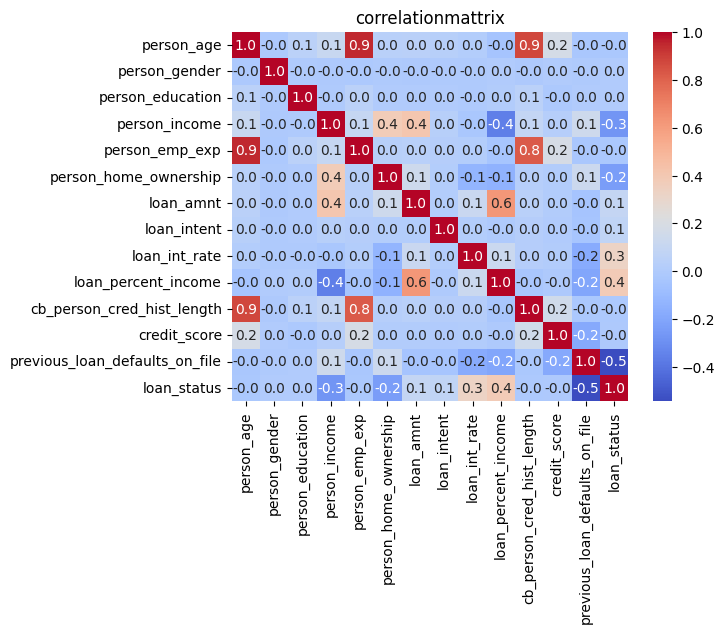

In [ ]:
cm=df.corr()
sns.heatmap(cm,annot=True,fmt="0.1f",cmap="coolwarm")
plt.title("correlationmattrix")
plt.show()

In [ ]:
df.drop(['cb_person_cred_hist_length',"person_emp_exp","person_age"],axis=1,inplace=True)

In [ ]:
df

,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file,loan_status
0,2,1,17666,1,4482,1,1055,49,561,1,1
1,2,2,69,2,10,2,567,8,504,2,0
2,2,2,75,3,1422,3,740,44,635,1,1
3,2,3,20271,1,4482,3,976,44,675,1,1
4,1,1,15770,1,4482,3,880,53,586,1,1
...,...,...,...,...,...,...,...,...,...,...,...
44995,1,4,8815,1,3550,3,1019,31,645,1,1
44996,2,4,15576,1,2417,5,860,14,621,1,1
44997,1,4,12260,1,537,6,455,5,668,1,1
44998,1,3,3353,1,3028,2,776,36,604,1,1


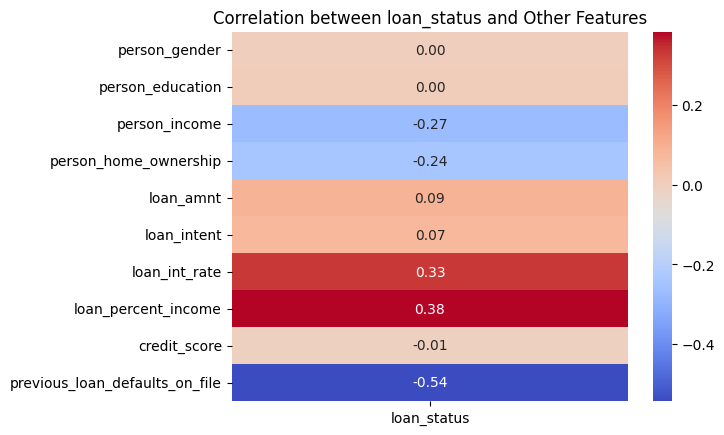

In [ ]:
survived_corr = df.corr()["loan_status"]
survived_corr = survived_corr.drop('loan_status')
sns.heatmap(survived_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, annot_kws={'size': 10})
plt.title('Correlation between loan_status and Other Features')
plt.show()

In [ ]:
df.drop([	"person_gender",'person_education','credit_score',"loan_amnt","loan_intent","credit_score"],axis=1,inplace=True)

<Axes: >

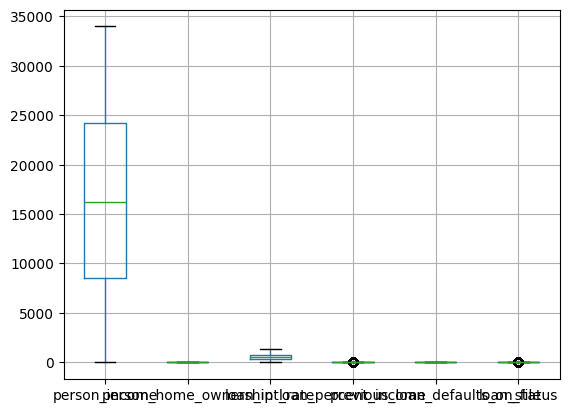

In [ ]:
df.boxplot()

In [ ]:
def remove_outliers_iqr(df,exclude_column):
  for col in df.columns:
    if col==exclude_column:
      continue
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
  return df

df_cleaned=remove_outliers_iqr(df,exclude_column='loan_status')
df=df_cleaned

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44256 entries, 1 to 44999
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   person_income                   44256 non-null  int64
 1   person_home_ownership           44256 non-null  int64
 2   loan_int_rate                   44256 non-null  int64
 3   loan_percent_income             44256 non-null  int64
 4   previous_loan_defaults_on_file  44256 non-null  int64
 5   loan_status                     44256 non-null  int64
dtypes: int64(6)
memory usage: 2.4 MB


In [ ]:
df.shape

(44256, 6)

In [ ]:
df

,person_income,person_home_ownership,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
1,69,2,567,8,2,0
5,101,2,167,19,1,1
6,23774,1,695,37,1,1
7,24201,1,564,37,1,1
8,25265,1,343,35,1,1
...,...,...,...,...,...,...
44995,8815,1,1019,31,1,1
44996,15576,1,860,14,1,1
44997,12260,1,455,5,1,1
44998,3353,1,776,36,1,1


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
features=["person_income","person_home_ownership","loan_int_rate","loan_percent_income","previous_loan_defaults_on_file","loan_status"]
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df[features])
scaled_df=pd.DataFrame(scaled_data,columns=features)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
X=df[["person_income","person_home_ownership","loan_int_rate","loan_percent_income","previous_loan_defaults_on_file","loan_status"]]
y=df['loan_status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.94


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
